In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
import seaborn as sns
import plotly.express as px 


url = 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/vehicles_us.csv'
data = requests.get(url)
with open('vehicles_us.csv', 'wb') as file:
    file.write(data.content)

car_datasets = pd.read_csv('vehicles_us.csv')
display(car_datasets)



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [4]:

car_datasets['model_year'] = pd.to_numeric(car_datasets['model_year'], errors='coerce')
car_datasets = car_datasets.drop_duplicates()
#car_datasets['model_year'] = car_datasets['model_year'].dt.year
car_datasets = car_datasets.dropna(subset=['model_year', 'price'])
car_datasets['model_year'] = car_datasets['model_year'].astype(int)

In [5]:
display(car_datasets.head(30))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
10,19500,2011,chevrolet silverado 1500,excellent,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38


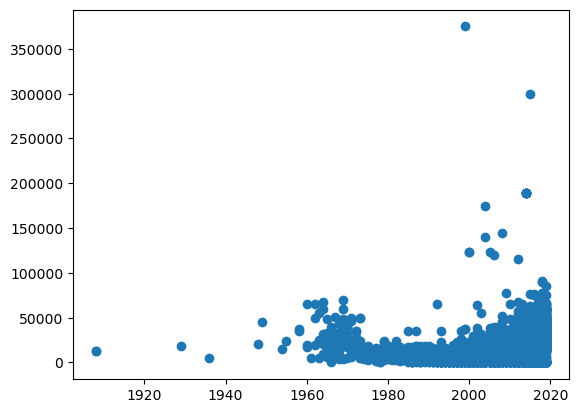

In [6]:
plt.scatter(car_datasets['model_year'], car_datasets['price'])
plt.show()

In [7]:
#this part of the code is clean up the dataset above, dealing with missing information that our data would be more accurate.
car_datasets['is_4wd'] = car_datasets['is_4wd'].fillna('false')
car_datasets['is_4wd'] = car_datasets['is_4wd'].replace(1.0, 'true')
car_datasets['is_4wd'] = car_datasets['is_4wd'].map({'false': False, 'true':True})


car_datasets['model_year'] = car_datasets['model_year'].fillna(pd.to_datetime('1900')) #filling all the missing values with a default value 1900
#car_datasets["model_year"] = car_datasets["model_year"].dt.to_period("Y") 
#car_datasets['model_year'] = car_datasets['model_year'].astype(str)
car_datasets['cylinders'] = car_datasets['cylinders'].astype(str)
car_datasets['cylinders'] = car_datasets['cylinders'].fillna('unknown')
car_datasets['paint_color'] = car_datasets['paint_color'].fillna('unknown')
#car_datasets['model_year'] = car_datasets['model_year'].fillna('unknown')

car_datasets['odometer'] = car_datasets['odometer'].fillna(0)




#this new datasets is to sort my datasets chronologically by year. Sorting it chronologically makes it easier to create graphs.
new_car_datasets = car_datasets.sort_values(by='model_year').reset_index()
view_car_datasets = new_car_datasets[new_car_datasets['model_year']!= '1900'].reset_index()





#car_datasets["price_category"].plot(kind="bar", edgecolor="black", title="price variation")




print(car_datasets['is_4wd'].unique())
print(car_datasets['paint_color'].unique())
print(car_datasets['type'].value_counts())
car_datasets.info()
print(car_datasets.duplicated().value_counts())
car_datasets.head(10)
display(view_car_datasets.head(10))



[ True False]
['unknown' 'red' 'black' 'white' 'blue' 'grey' 'silver' 'custom' 'orange'
 'yellow' 'brown' 'green' 'purple']
type
truck          11517
SUV            11486
sedan          11306
pickup          6484
coupe           2158
wagon           1431
mini-van        1075
hatchback        974
van              594
convertible      419
other            234
offroad          204
bus               24
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         47906 non-null  int64  
 1   model_year    47906 non-null  int64  
 2   model         47906 non-null  object 
 3   condition     47906 non-null  object 
 4   cylinders     47906 non-null  object 
 5   fuel          47906 non-null  object 
 6   odometer      47906 non-null  float64
 7   transmission  47906 non-null  object 
 8   type          47906 non-null  obj

,level_0,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,0,33907,12995,1908,cadillac escalade,excellent,8.0,gas,0.0,automatic,SUV,white,False,2018-06-24,25
1,1,33906,12995,1908,gmc yukon,good,8.0,gas,169328.0,automatic,SUV,black,False,2018-07-06,34
2,2,45694,18000,1929,ford f-150,good,8.0,gas,0.0,manual,other,silver,False,2018-11-18,59
3,3,34713,5000,1936,ford f-150,excellent,6.0,gas,30000.0,manual,pickup,purple,False,2018-11-22,10
4,4,22595,21000,1948,chevrolet impala,like new,8.0,gas,4000.0,automatic,sedan,red,False,2019-01-18,24
5,5,36582,44900,1949,chevrolet suburban,good,nan,gas,1800.0,automatic,wagon,orange,False,2018-08-19,10
6,6,14752,15000,1954,ford f-150,excellent,nan,gas,3565.0,manual,pickup,black,False,2019-02-16,13
7,7,10018,23900,1955,ford f250,excellent,6.0,gas,47180.0,manual,truck,blue,False,2018-12-22,61
8,8,48414,37900,1958,chevrolet impala,good,8.0,gas,62799.0,automatic,coupe,unknown,False,2018-08-11,10
9,9,39580,35000,1958,chevrolet impala,excellent,8.0,gas,3184.0,automatic,coupe,black,False,2018-05-19,33


In [8]:
display(new_car_datasets.head(10))

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,33907,12995,1908,cadillac escalade,excellent,8.0,gas,0.0,automatic,SUV,white,False,2018-06-24,25
1,33906,12995,1908,gmc yukon,good,8.0,gas,169328.0,automatic,SUV,black,False,2018-07-06,34
2,45694,18000,1929,ford f-150,good,8.0,gas,0.0,manual,other,silver,False,2018-11-18,59
3,34713,5000,1936,ford f-150,excellent,6.0,gas,30000.0,manual,pickup,purple,False,2018-11-22,10
4,22595,21000,1948,chevrolet impala,like new,8.0,gas,4000.0,automatic,sedan,red,False,2019-01-18,24
5,36582,44900,1949,chevrolet suburban,good,nan,gas,1800.0,automatic,wagon,orange,False,2018-08-19,10
6,14752,15000,1954,ford f-150,excellent,nan,gas,3565.0,manual,pickup,black,False,2019-02-16,13
7,10018,23900,1955,ford f250,excellent,6.0,gas,47180.0,manual,truck,blue,False,2018-12-22,61
8,48414,37900,1958,chevrolet impala,good,8.0,gas,62799.0,automatic,coupe,unknown,False,2018-08-11,10
9,39580,35000,1958,chevrolet impala,excellent,8.0,gas,3184.0,automatic,coupe,black,False,2018-05-19,33


In [9]:
new_car_datasets.dtypes


index             int64
price             int64
model_year        int64
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd             bool
date_posted      object
days_listed       int64
dtype: object

In [10]:
car_data = car_datasets[['price', 'model_year', 'odometer']]

In [11]:
#view_car_datasets['model_year'] = view_car_datasets['model_year'].astype(int)

In [12]:
view_car_datasets['model_year'].unique()

array([1908, 1929, 1936, 1948, 1949, 1954, 1955, 1958, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019])

<function matplotlib.pyplot.show(close=None, block=None)>

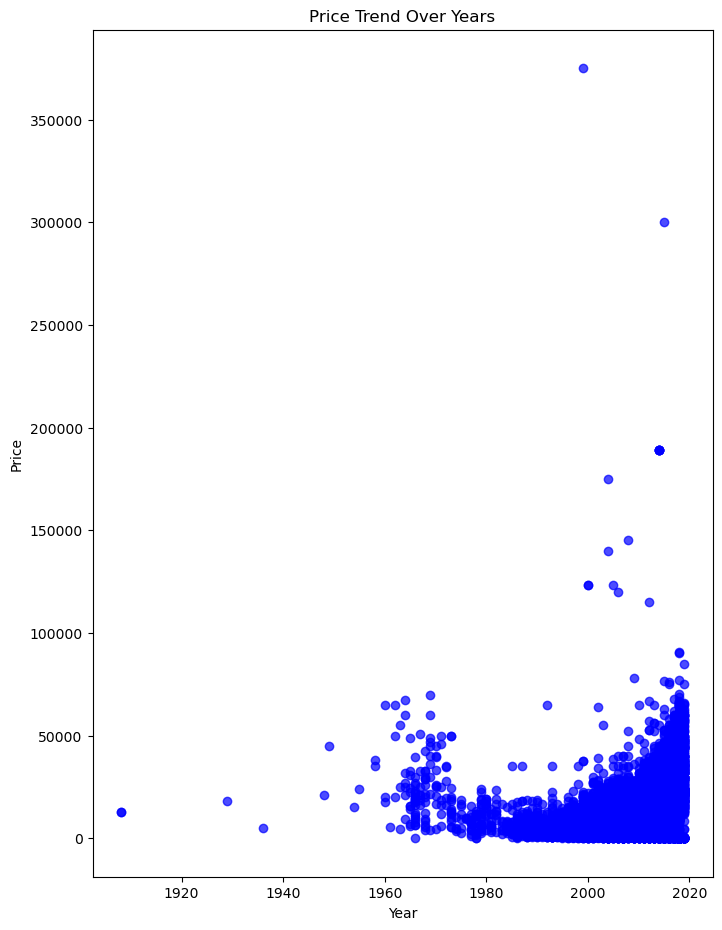

In [13]:
plt.figure(figsize=(8,11))
plt.scatter(new_car_datasets["model_year"], new_car_datasets["price"], color="blue", alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Price Trend Over Years")
plt. show

In [14]:

def y_decade(row):
    year = row['model_year']   # Access column
    if year <= 1920:
        return '1900-1920'
    elif year <= 1940:
        return '1920-1940'
    elif year <= 1960:
        return '1940-1960'
    elif year <= 1980:
        return '1960-1980'
    elif year <= 2000:
        return '1980-2000'
    else:
        return '2000-2020'

new_car_datasets['year_range'] = new_car_datasets.apply(y_decade, axis=1)


In [15]:
#group_data = new_car_datasets.groupby('model_year')['price'].mean().reset_index()
#display(group_data)
#plt.hist(group_data['model_year'])
#plt.xlabel("year")
#plt.ylabel("money")
#plt.title("Histogram of Prices")
#plt.show()

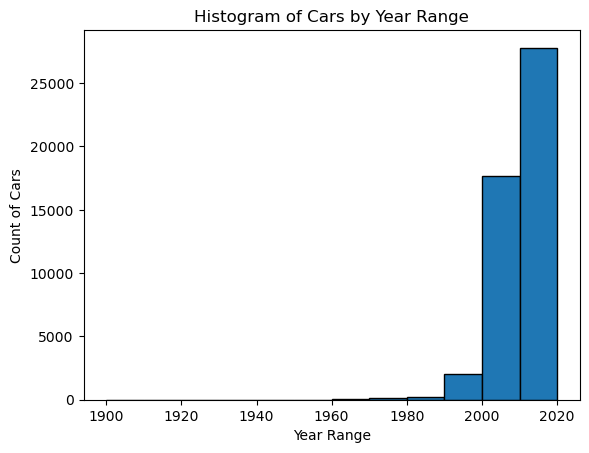

In [16]:

plt.hist(new_car_datasets["model_year"], bins=range(1900, 2021, 10), edgecolor="black")

plt.xlabel("Year Range")
plt.ylabel("Count of Cars")
plt.title("Histogram of Cars by Year Range")
plt.show()